# Lumi Space Internship: Plotting a TLE <br>
## Olivia Marie Gough <br>
A TLE, short for two-line element set, encodes a list of orbital elements of a satellite. This set of data can be used to predict a satellites position and velocity using simplified perturbations models. I will be using the libraries numpy and matplotlib  to visualise the data given.

In [42]:
# 1 25544U 98067A   19091.54921296  .00002326  00000-0  44830-4 0  9994 
# 2 25544  51.6429  22.1968 0002430 134.4838 212.9945 15.52470701163348

In [35]:
line1= 1
satellite_number1 = 25544
classification1 = 'U' 
international_designator_year = 98
international_designator_number = 67
international_designator_piece = 'A'
epoch_year = 19
epoch_day = 091.54921296  
first_time_deriv = .00002326  
#second_time_deriv = 00000-0  
BSTAR = 44830-4 
zero = 0  
element_set = 999
checksum1 = 4 


line2 = 2 
satellite_number2 = 25544
inclination = 51.6429  
RA = 22.1968 
eccentricity = .0002430 
argument_perigee = 134.4838 
mean_anomaly = 212.9945 
mean_motion = 15.52470701
rev = 16334
checksum2 = 8

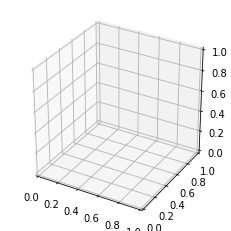

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#importing the relevant modules needed

figure = plt.figure(figsize=plt.figaspect(1))
ax = figure.add_subplot(111, projection='3d', aspect = 1)
max_radius = 0
#plot axes

def earth_plot():
    earth_radius = 6371
    global max_radius
    max_radius = max(max_radius,earth_radius)
    coeffecients = (100,1,1)
    rx, ry, rz = [earth_radius/np.sqrt(coeffecients) for coefs in coeffecients]
    p = np.linspace(0, 2*np.pi, 100)
    q = np.linspace(0, np.pi, 100)
    x = rx * np.outer(np.cos(p),np.sin(q))
    y = ry * np.outer(np.sin(p),np.sin(q))
    z = rz * np.outer(np.ones_like(p), np.cos(q))
    ax.plot_surface(x,y,z, rstride=4, cstride=4)
    #this function plots the Earth as a globe
    
def orbit_plot(semi_major_axis, eccentricity = 0, inclination = 0, RA = 0, argument_perigee = 0, mean_anomaly = 0, label = None):
    inc = inclination * np.pi / 180.;
    R1 = np.matrix([[1, 0, 0],
                  [0, np.cos(inc), -np.sin(inc)],
                  [0, np.sin(inc), np.cos(inc)]]) #rotation matrix for inclination
    
    rot = (RA + argument_perigee) * np.pi/180
    R2 = np.matrix([[np.cos(rot), -np.sin(rot), 0],
                   [np.sin(rot), np.cos(rot), 0],
                   [0, 0, 1]]) #rotation matrix for perigee argument and RA
    
    theta = np.linspace(0, 2*np.pi, 360)
    r = (semi_major_axis*(1-eccentricity**2)) / (1 + eccentricity*np.cos(theta))
    
    xr = r*np.cos(theta)
    yr = r*np.sin(theta)
    zr = 0*theta
    
    pts = np.matrix(zip(xr,yr,zr))
    pts = (R1 * R2 * pts.T).T
    xr,yr,zr = pts[:,0].A.flatten(), pts[:,1].A.flatten(), pts[:,2].A.flatten()
    ax.plot(xr,yr,zr, '-')
    
    ANGLE = mean_anomaly * np.pi/180
    r_satellite = (semi_major_axis*(1-eccentricity**2)) / (1 + eccentricity*np.cos(ANGLE))
    x_satellite = r_satellite * np.cos(ANGLE)
    y_satellite = r_satellite * np.sin(ANGLE)
    z_satellite = 0
    
    satellite = (R1 * R2 * np.matrix([x_satellite, y_satellite, z_satellite]).T).flatten()
    x_satellite = satellite[0,0]
    y_satellite = satellite[0,1]
    z_satellite = satellite[0,2]
    
    c = np.sqrt(x_satellite**2 + y_satellite**2)
    lat = np.arctan2(z_satellite, c) * 180/np.pi
    long =  np.arctan2(y_satellite, x_satellite) * 180/np.pi
    
    ax.plot([x_satellite],[y_satellite],[z_satellite],'ro')
    
    global max_radius
    max_radius = max(max(r), max_radius)
    
    
    
def adjust():
    for axis in 'xyz':
        getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
        plt.show()

In [41]:
earth_plot()
orbit_plot()
adjust()

ValueError: operands could not be broadcast together with shapes (3,) (100,100) 